## 鸢尾花数据集

In [14]:
import pandas as pd

In [15]:
data = pd.read_csv(r'../data/iris.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 特征值标准化

In [16]:
all_features = data.iloc[:,1:-1]
all_features = all_features.apply(
    lambda x: (x - x.mean()) / (x.std())
)

In [17]:
all_labels = data.Species
all_labels.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
pd.factorize(all_labels)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

In [19]:
all_labels = pd.factorize(all_labels)[0]
all_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [20]:
idx_to_species = {}
for i in range(len(data.Species.unique())):
    idx_to_species[i] = data.Species.unique()[i]
idx_to_species

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

### 分割数据集

In [21]:
import torch
from sklearn.model_selection import train_test_split

In [22]:
train_x, test_x, train_y, test_y = train_test_split(all_features.values, all_labels, shuffle=True)

In [23]:
train_x = torch.from_numpy(train_x).type(torch.float32)
train_y = torch.from_numpy(train_y).type(torch.int64)
test_x = torch.from_numpy(test_x).type(torch.float32)
test_y = torch.from_numpy(test_y).type(torch.LongTensor)

In [34]:
train_y

tensor([2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0,
        1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0,
        2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0,
        2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0])

In [24]:
from torch.utils.data import DataLoader, TensorDataset

In [25]:
BATCHSIZE = 8
train_iter = DataLoader(TensorDataset(train_x, train_y), batch_size=BATCHSIZE, shuffle=True)
test_iter = DataLoader(TensorDataset(test_x, test_y), batch_size=BATCHSIZE)

In [26]:
import torch
from torch import nn
import torch.nn.functional as F

In [38]:
in_features = all_features.shape[1]
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 3)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

model = Net()
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

In [40]:
x, y = next(iter(train_iter))
model(x)

tensor([[ 0.1556,  0.0832,  0.4517],
        [ 0.2113,  0.0040,  0.2685],
        [ 0.1795,  0.0478,  0.3906],
        [ 0.4053, -0.2343, -0.0850],
        [ 0.2689,  0.0015,  0.2253],
        [ 0.2669,  0.0015,  0.2249],
        [ 0.2990, -0.1299, -0.0426],
        [ 0.2921, -0.0671,  0.0585]], grad_fn=<AddmmBackward0>)

In [28]:
def accuracy(y_pred, y_true):
    y_pred = torch.argmax(y_pred, dim=1)
    acc = (y_pred == y_true).float().mean()
    return acc

In [29]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

epochs = 100

for epoch in range(epochs):
    for x, y in train_iter:
        y_pred = model(x)
        l = loss(y_pred, y)
        opt.zero_grad()
        l.backward()
        opt.step()
    with torch.no_grad():
        epoch_accuracy = accuracy(model(train_x), train_y)
        epoch_loss = loss(model(train_x), train_y).data
        
        epoch_test_accuracy = accuracy(model(test_x), test_y)
        epoch_test_loss = loss(model(test_x), test_y).data
        print('epoch: ', epoch, 'loss： ', round(epoch_loss.item(), 3),
                                'accuracy:', round(epoch_accuracy.item(), 3),
                                'test_loss： ', round(epoch_test_loss.item(), 3),
                                'test_accuracy:', round(epoch_test_accuracy.item(), 3)
             )
        
        train_loss.append(epoch_loss)
        train_acc.append(epoch_accuracy)
        test_loss.append(epoch_test_loss)
        test_acc.append(epoch_test_accuracy)

epoch:  0 loss：  0.993 accuracy: 0.741 test_loss：  1.026 test_accuracy: 0.605
epoch:  1 loss：  0.929 accuracy: 0.821 test_loss：  0.975 test_accuracy: 0.711
epoch:  2 loss：  0.853 accuracy: 0.839 test_loss：  0.915 test_accuracy: 0.763
epoch:  3 loss：  0.768 accuracy: 0.839 test_loss：  0.843 test_accuracy: 0.763
epoch:  4 loss：  0.681 accuracy: 0.857 test_loss：  0.769 test_accuracy: 0.763
epoch:  5 loss：  0.6 accuracy: 0.875 test_loss：  0.694 test_accuracy: 0.763
epoch:  6 loss：  0.534 accuracy: 0.875 test_loss：  0.629 test_accuracy: 0.763
epoch:  7 loss：  0.479 accuracy: 0.875 test_loss：  0.574 test_accuracy: 0.789
epoch:  8 loss：  0.429 accuracy: 0.884 test_loss：  0.527 test_accuracy: 0.789
epoch:  9 loss：  0.387 accuracy: 0.884 test_loss：  0.485 test_accuracy: 0.789
epoch:  10 loss：  0.35 accuracy: 0.884 test_loss：  0.454 test_accuracy: 0.789
epoch:  11 loss：  0.318 accuracy: 0.884 test_loss：  0.42 test_accuracy: 0.789
epoch:  12 loss：  0.294 accuracy: 0.902 test_loss：  0.386 test_acc

In [30]:
import matplotlib.pyplot as plt

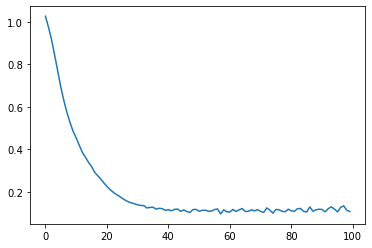

In [31]:
plt.plot(test_loss)

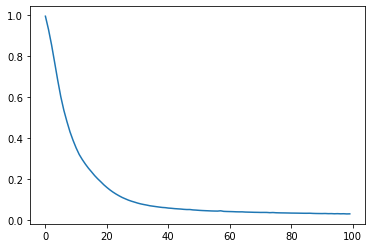

In [32]:
plt.plot(train_loss)